# Final Exam: Paper 2

Student: DC427182

## Question 0

In [2]:
pip install empiricaldist

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import empiricaldist as ed
import matplotlib.pyplot as plt
import scipy.stats as stats

## Question 1

        SEX   HTM4   WTKG3  INCOME2       _LLCPWT  _AGEG5YR  _VEGESU1  \
96230   2.0  160.0   60.33      8.0   1398.525290       6.0      2.14   
244920  2.0  163.0   58.97      5.0     84.057503      13.0      3.14   
57312   2.0  163.0   72.57      8.0    390.248599       5.0      2.64   
32573   2.0  165.0   74.84      1.0  11566.705300       3.0      1.46   
355929  2.0  170.0  108.86      3.0    844.485450       3.0      1.81   

        _HTMG10   AGE  
96230     150.0  47.0  
244920    160.0  89.5  
57312     160.0  42.0  
32573     160.0  32.0  
355929    160.0  32.0  

 LinregressResult(slope=0.06988048092105006, intercept=1.5287786243363113, rvalue=0.11967005884864092, pvalue=1.378503916249654e-238, stderr=0.0021109763563323305, intercept_stderr=0.013196467544093591) 



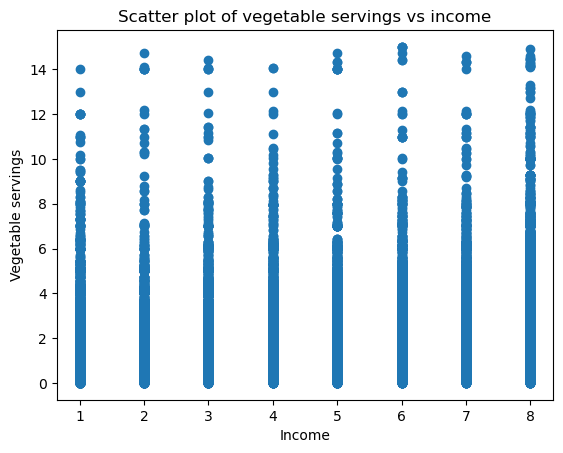

In [19]:
#01.01: Load the "brfss.hdf5" dataset into a dataframe
#01.02: Extract the columns 'INCOME2' and '_VEGESU1' from subset into xs and ys respectively. Hint: For this exercise, use income as xs and vegetable servings as ys.
#01.03: Compute the simple linear regression of these variables. Hint: Use linregress() to compute the linear regression between xs and ys.

def answer_FinalExam_Paper02_Question_01():
    #01.01
    df = pd.read_hdf('data/brfss.hdf5', 'brfss')
    print(df.head())
    #01.02
    #make sure values are not null
    df = df.dropna(subset=['INCOME2', '_VEGESU1'])
    #make sure data is numeric
    df['INCOME2'] = pd.to_numeric(df['INCOME2'], errors='coerce')
    df['_VEGESU1'] = pd.to_numeric(df['_VEGESU1'], errors='coerce')
    #extract columns
    xs = df['INCOME2']
    ys = df['_VEGESU1']
    #01.03
    res = stats.linregress(xs, ys)
    print('\n',res,'\n')
    # create the plot
    plt.plot(xs, ys, 'o')
    plt.xlabel('Income')
    plt.ylabel('Vegetable servings')
    plt.title('Scatter plot of vegetable servings vs income')

answer_FinalExam_Paper02_Question_01()

## Question 2

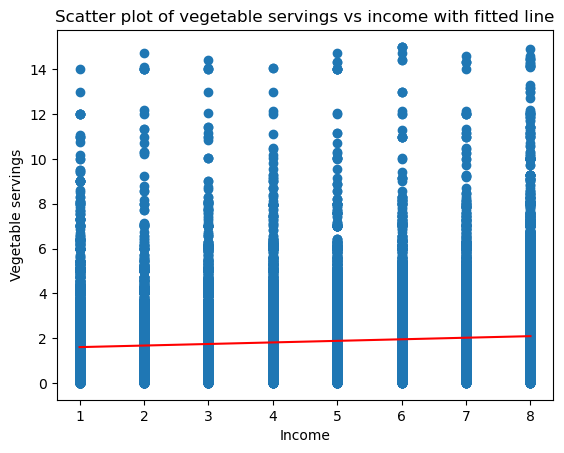

In [12]:
#02.01: Set fx to the minimum and maximum of xs, stored in a NumPy array. Hint: fx should be a NumPy array with two elements.
#02.02: Set fy to the points on the fitted line that correspond to the xs. Hint: To get fy, multiply xs by res.slope and add the intercept. 

def answer_FinalExam_Paper02_Question_02():
    #recycle code from previous question
    df = pd.read_hdf('data/brfss.hdf5', 'brfss')
    df = df.dropna(subset=['INCOME2', '_VEGESU1'])
    df['INCOME2'] = pd.to_numeric(df['INCOME2'], errors='coerce')
    df['_VEGESU1'] = pd.to_numeric(df['_VEGESU1'], errors='coerce')
    xs = df['INCOME2']
    ys = df['_VEGESU1']
    res = stats.linregress(xs, ys)
    #02.01
    fx = np.array([xs.min(), xs.max()])
    #02.02
    fy = res.intercept + res.slope * fx
    # create the plot
    plt.plot(xs, ys, 'o')
    plt.plot(fx, fy, '-r', label='fitted line')
    plt.xlabel('Income')
    plt.ylabel('Vegetable servings')
    plt.title('Scatter plot of vegetable servings vs income with fitted line')
    

answer_FinalExam_Paper02_Question_02()

## Question 3

Which of the following conclusions can we draw from this data?

A. Eating a good diet leads to better health and higher income.

B. People with higher income can afford a better diet.

C. People with high income are more likely to be vegetarians.

Possible Answers:

A only

B only 

B and C

None of them

**Answer:**

None of them. 

It seems that the consumption of vegetables is not linearly related to income.

## Question 4

In [13]:
#04.01: Compute the regression of '_VEGESU1' as a function of 'INCOME2' using SciPy's linregress()
#04.02: Compute the regression of '_VEGESU1' as a function of 'INCOME2' using StatsModels' smf.ols().
#Hint: ols() takes two parameters, a formula string and a DataFrame (keyword data). The names in the formula string correspond to the columns in the DataFrame.

import statsmodels.formula.api as smf

def answer_FinalExam_Paper02_Question_04():
    #04.01
    df = pd.read_hdf('data/brfss.hdf5', 'brfss')
    df = df.dropna(subset=['INCOME2', '_VEGESU1'])
    df['INCOME2'] = pd.to_numeric(df['INCOME2'], errors='coerce')
    df['_VEGESU1'] = pd.to_numeric(df['_VEGESU1'], errors='coerce')
    xs = df['INCOME2']
    ys = df['_VEGESU1']
    res1 = stats.linregress(xs, ys)
    print('Regression using linregress: \n', res1, '\n')
    #04.02
    df = pd.read_hdf('data/brfss.hdf5', 'brfss')
    df = df.dropna(subset=['INCOME2', '_VEGESU1'])
    df['INCOME2'] = pd.to_numeric(df['INCOME2'], errors='coerce')
    df['_VEGESU1'] = pd.to_numeric(df['_VEGESU1'], errors='coerce')
    res2 = smf.ols('_VEGESU1 ~ INCOME2', data=df).fit()
    print('Regression using ols: \n', res2.summary())

answer_FinalExam_Paper02_Question_04()


Regression using linregress: 
 LinregressResult(slope=0.06988048092105006, intercept=1.5287786243363113, rvalue=0.11967005884864092, pvalue=1.378503916249654e-238, stderr=0.0021109763563323305, intercept_stderr=0.013196467544093591) 

Regression using ols: 
                             OLS Regression Results                            
Dep. Variable:               _VEGESU1   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1096.
Date:                Sat, 14 Dec 2024   Prob (F-statistic):          1.38e-238
Time:                        11:13:20   Log-Likelihood:            -1.2571e+05
No. Observations:               75426   AIC:                         2.514e+05
Df Residuals:                   75424   BIC:                         2.514e+05
Df Model:                           1                                         
Covariance Type:            no

## Question 5

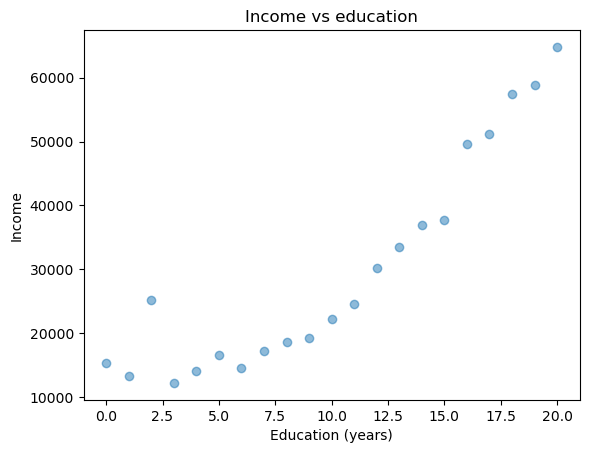

In [14]:
#05.01: Group gss by 'educ'. Store the result in grouped. Hint: Use the .groupby() method on gss to group by 'educ'.
#05.02: From grouped, extract 'realinc' and compute the mean. Hint: You can treat the GroupBy object as if it were a DataFrame.
#05.03: Plot mean_income_by_educ as a scatter plot. Specify 'o' and alpha=0.5. Hint: Use plt.plot() to make the scatter plot.

def answer_FinalExam_Paper02_Question_05():
    #05.01
    gss = pd.read_hdf('data/gss.hdf5', 'gss')
    grouped = gss.groupby('educ')
    #05.02
    mean_income_by_educ = grouped['realinc'].mean()
    #05.03
    plt.plot(mean_income_by_educ, 'o', alpha=0.5)
    plt.xlabel('Education (years)')
    plt.ylabel('Income')
    plt.title('Income vs education')

answer_FinalExam_Paper02_Question_05()

## Question 6

In [15]:
#06.01: Add two columns named respectively as 'educ2' and 'age2' to the gss DataFrame; it should contain the values from 'educ' and 'age' squared.
#06.02: Run a regression model that uses 'educ', 'educ2', 'age', and 'age2' to predict 'realinc'
#Hint: Use smf.ols() to make the model and .fit() to estimate the parameters.

def answer_FinalExam_Paper02_Question_06():
    #06.01
    gss = pd.read_hdf('data/gss.hdf5', 'gss')
    gss['educ2'] = gss['educ']**2
    gss['age2'] = gss['age']**2
    #06.02
    model = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss)
    results = model.fit()
    print(results.summary())

answer_FinalExam_Paper02_Question_06()

                            OLS Regression Results                            
Dep. Variable:                realinc   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     2792.
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:13:23   Log-Likelihood:            -6.4520e+05
No. Observations:               55345   AIC:                         1.290e+06
Df Residuals:                   55340   BIC:                         1.290e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.324e+04   1501.499    -15.479      0.0

## Question 7

In [16]:
#07.01: Using np.linspace(), add a variable named 'educ' to df with a range of values from 0 to 20.
#07.02: Add a variable named 'age' with the constant value 30.
#07.03: Use df to generate predicted income as a function of education.
#Hint: results has a method called .predict() that takes a DataFrame and returns a Series.

def answer_FinalExam_Paper02_Question_07():
    #recycle code from previous question
    gss = pd.read_hdf('data/gss.hdf5', 'gss')
    gss['educ2'] = gss['educ']**2
    gss['age2'] = gss['age']**2
    model = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss)
    results = model.fit()
    #07.01
    df = pd.DataFrame()
    df['educ'] = np.linspace(0, 20)
    df['educ2'] = df['educ']**2
    #07.02
    df['age'] = 30
    df['age2'] = df['age']**2
    #07.03
    pred = results.predict(df)
    print(pred)

answer_FinalExam_Paper02_Question_07()

0     12182.344976
1     11993.358518
2     11857.672098
3     11775.285717
4     11746.199374
5     11770.413069
6     11847.926802
7     11978.740574
8     12162.854384
9     12400.268232
10    12690.982118
11    13034.996043
12    13432.310006
13    13882.924007
14    14386.838046
15    14944.052124
16    15554.566240
17    16218.380394
18    16935.494586
19    17705.908817
20    18529.623086
21    19406.637393
22    20336.951738
23    21320.566122
24    22357.480544
25    23447.695004
26    24591.209502
27    25788.024039
28    27038.138614
29    28341.553227
30    29698.267878
31    31108.282568
32    32571.597295
33    34088.212062
34    35658.126866
35    37281.341709
36    38957.856589
37    40687.671509
38    42470.786466
39    44307.201462
40    46196.916495
41    48139.931567
42    50136.246678
43    52185.861826
44    54288.777013
45    56444.992238
46    58654.507502
47    60917.322803
48    63233.438143
49    65602.853521
dtype: float64


## Question 8

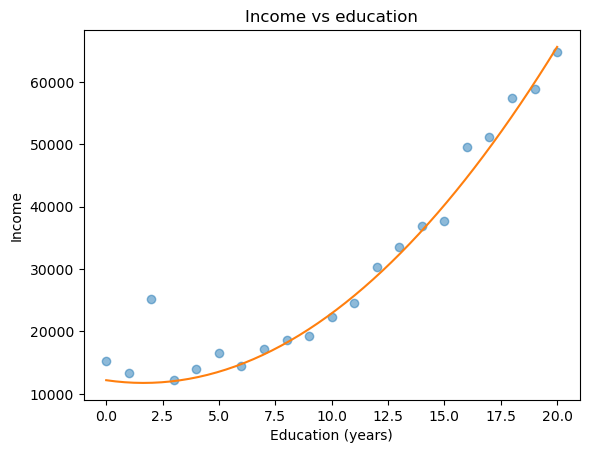

In [17]:
#08.01: Plot mean_income_by_educ using circles ('o'). Specify an alpha of 0.5.
#08.02: Plot the prediction results with a line, with df['educ'] on the x-axis and pred on the y-axis.
#Hint: Use plt.plot() to create the plots.

def answer_FinalExam_Paper02_Question_08():
    #recycle code from previous question
    gss = pd.read_hdf('data/gss.hdf5', 'gss')
    gss['educ2'] = gss['educ']**2
    gss['age2'] = gss['age']**2
    grouped = gss.groupby('educ')
    mean_income_by_educ = grouped['realinc'].mean()
    model = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss)
    results = model.fit()
    df = pd.DataFrame()
    df['educ'] = np.linspace(0, 20)
    df['educ2'] = df['educ']**2
    df['age'] = 30
    df['age2'] = df['age']**2
    pred = results.predict(df)
    #08.01
    plt.plot(mean_income_by_educ, 'o', alpha=0.5)
    #08.02
    plt.plot(df['educ'], pred)
    plt.xlabel('Education (years)')
    plt.ylabel('Income')
    plt.title('Income vs education')

answer_FinalExam_Paper02_Question_08()